# Python Assignment 4

⏱⏱⏱**Due: 11/30/2025 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 1. Good presentation of your code and outputs; submitting your files to Github (10 pts)

Ensure thorough and clear comments within your code to explain its functionality.

Enhance your plots by adding titles, legends, and axis labels where appropriate to provide clarity.

If necessary, employ LaTex notation to present mathematical explanations within the notebook.

Divide your code into multiple blocks or cells in Jupyter Notebook and provide descriptive explanations for each block to improve readability.

As part of your submission, include the notebook files and upload them to your Git repository. Additionally, remember to provide a link to your Git repository when submitting the files on Brightspace.

Please adhere to the constraint of using only the `numpy`, `torch`, `scipy`, and `matplotlib` libraries for this assignment, as it is feasible to complete the task without introducing additional libraries or packages.



## 2. Implementing Gradient Descent Algorithm (60 pts)

Given a function $f(x) = \sqrt{x^2+5}$, $x\in \mathbf{R}$.

Fact: This function is L-smooth.
0. Find the gradient of this function and the minimum value of this function analytically.


1. Plot this function over the interval $[-5, 5]$.
2. Perform the Gradient Descent algorithm to find the minimum value of $f$ for $50$ iterations ($T$) with a step size of $1$ ($\alpha$). Use the last digit of your SB ID divided by 5 and then plus 1 as the initial guess (for example, if your ID ends with 9, your initial guess $x_0$ will be $9\div5 + 1= 2.8$).
3. Record the values of $x_k$ at the $k$-th iteration during GD and report $x_T$.
4. Plot the value of $f(x_k)$ v.s. the iteration number $k$.
5. For each of the step sizes 5, 3, 1, and 0.5, perform gradient descent and record the values of $x_k$ in each step $k$. Plot $f(x_{k-1}) - f(x_{k})$ v.s. $k$ for each step size. Your graphs should all be included in a single plot. Examine if $f(x_{k-1}) - f(x_{k})$ (which means that $f(x_k)$ is always decreasing) is always positive for all $k$.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o1.png)
![o2](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o2.png)
![o3](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o3.png)

Please note that the graphs generated as output may not precisely match the ones I'm providing here. The disparities could be significant, as I'm presenting a general overview of the expected graph. I've adjusted certain parameters/plot information in the graph generation process to prevent disclosing the "answer/solution".&nbsp;


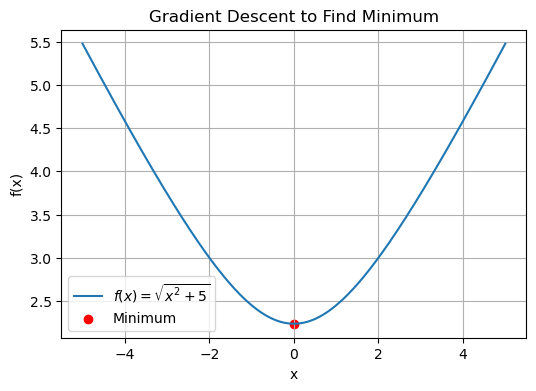

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Describe the function that we wish to examine.
 #  For each input x, this yields f(x) = sqrt(x^2 + 5).
def funcValue(x):
    """f(x) = sqrt(x^2 + 5)"""
    return np.sqrt(x**2 + 5)

# To draw the curve well, provide a smooth collection of x-values between -5 and 5.
# Set up the figure size and draw the function.
# Indicate the function's true minimum point, which occurs at x = 0.
xGrid = np.linspace(-5, 5, 400)
yGrid = funcValue(xGrid)

plt.figure(figsize=(6, 4))
plt.plot(xGrid, yGrid, label=r"$f(x) = \sqrt{x^2 + 5}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Gradient Descent to Find Minimum")
plt.grid(True)

# Show the legend and display the final plot.
minX = 0.0
minY = funcValue(minX)
plt.scatter(minX, minY, color="red", label="Minimum")
plt.legend()
plt.show()


Final x_T after 50 iterations with step size 1: 4.556057158298213e-13
f(x_T) = 2.23606797749979


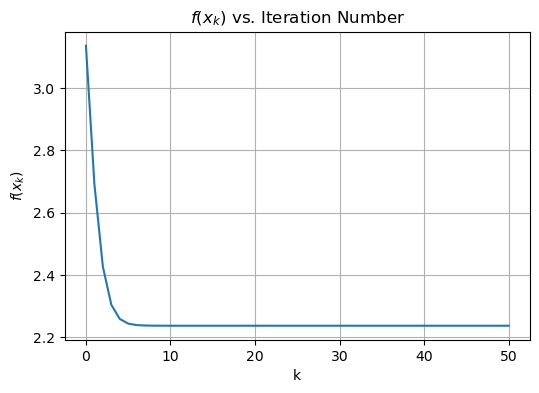

In [26]:
# The f(x) derivative. 
 #  To determine which way to go, gradient descent requires the function's slope at each point. 
 #  The derivative of f(x) = sqrt(x^2 + 5) is f'(x) = x / sqrt(x^2 + 5).

def gradValue(x):
    """f'(x) = x / sqrt(x^2 + 5)"""
    return x / np.sqrt(x**2 + 5)
# Basic gradient descent is carried out via this function.
 #  It begins with an initial guess, x0, and uses the following rule to update it repeatedly:   x_{k+1} = gradient * stepSize * x_k
 #  Moving in the direction that lowers the function value is the idea.
 #  In order to examine the convergence later, we keep a list of all the values of x_k.
def gradientDescent(initialX, stepSize, numIterations):
    """
    Run basic gradient descent for a 1D function.
    Returns array of x_k values for k = 0, 1, ..., numIterations.
    """
    xHistory = [initialX]

    for k in range(numIterations):
        currentX = xHistory[-1]
        grad = gradValue(currentX)
        #In order to minimize the function, take a step in the opposite direction as the gradient.
        newX = currentX - stepSize * grad
        xHistory.append(newX)

    return np.array(xHistory)

# Using the SB ID rule, select the beginning point x0. Mine is 6 so it will come 2.2
# The algorithm begins with this value as its initial guess.
initialX = 2.2
stepSize = 1.0
numIterations = 50

xHistory = gradientDescent(initialX, stepSize, numIterations)

xT = xHistory[-1]
print("Final x_T after", numIterations, "iterations with step size 1:", xT)
print("f(x_T) =", funcValue(xT))


kValues = np.arange(len(xHistory))          # 0 ... numIterations
fHistory = funcValue(xHistory)
# Plot the evolution of f(x_k) across the iterations.
# A well-behaved gradient descent should exhibit a progressive decrease in f(x_k).
plt.figure(figsize=(6, 4))
plt.plot(kValues, fHistory)
plt.xlabel("k")
plt.ylabel(r"$f(x_k)$")
plt.title(r"$f(x_k)$ vs. Iteration Number")
plt.grid(True)
plt.show()


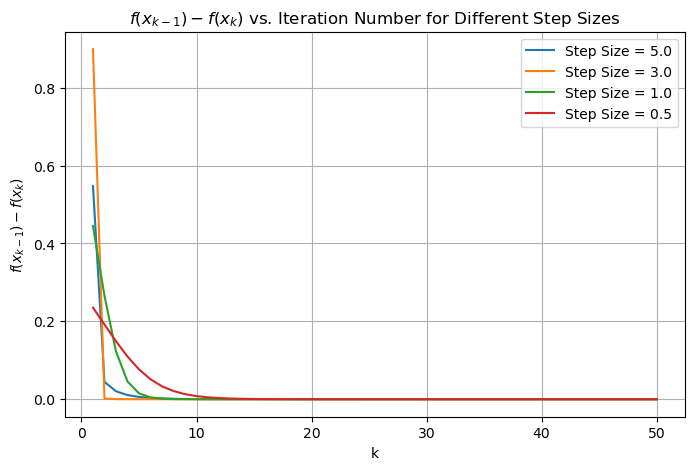

In [27]:
# Select a few different step sizes to observe how they impact convergence behavior. 
# Smaller step sizes are safer but slower, whereas larger step sizes move more quickly but may be unstable.

stepSizeList = [5.0, 3.0, 1.0, 0.5]
numIterations = 50

plt.figure(figsize=(8, 5))
#Run gradient descent for each step size and monitor the improvement in the function's value from iteration to iteration: f(x_{k-1}) - f(x_k).
for currentStepSize in stepSizeList:
    xHistoryStep = gradientDescent(initialX, currentStepSize, numIterations)
    fHistoryStep = funcValue(xHistoryStep)

   # Determine how much the function value decreases between iterations:
    # diffHistory[k-1] = f(x_{k-1}) - f(x_k)
    diffHistory = fHistoryStep[:-1] - fHistoryStep[1:]
    kValuesDiff = np.arange(1, numIterations + 1)

    plt.plot(kValuesDiff, diffHistory, label=f"Step Size = {currentStepSize}")

plt.xlabel("k")
plt.ylabel(r"$f(x_{k-1}) - f(x_k)$")
plt.title(r"$f(x_{k-1}) - f(x_k)$ vs. Iteration Number for Different Step Sizes")
plt.grid(True)
plt.legend()
plt.show()

# initialize a list to store the results from different step sizes

## 3. Linear Regression with Numpy and Graphing with Matplotlib (30 pts)

In class, we implemented a linear regression model with one-dimensional features ( $x$-values). However, below, you will find the code for generating synthetic data where the features ( $x$-values) are now two-dimensional.

**Change the random seed to be the last two digits of your student ID. For example, if your ID is 123456987, change the random seed to be 87.**

The next step involves performing linear regression on this newly generated data. We will employ the normal equation, a topic covered in class, to determine the coefficients and intercept (weights and bias).

**Report the parameter values and plot the generated data and the regression plane (in 1D, we have a line, but in 2D, we have a plane).** `numpy.linspace`, `numpy.meshgrid`, and [Surface Plot](https://matplotlib.org/stable/gallery/mplot3d/surface3d.html) methods might be helpful in plotting the plane. You don't have to use them, it is just my suggestions.

Here are some sample output graphs. Yours do not have to look exactly like mine, it is just for your reference.
![o1](https://raw.githubusercontent.com/wenhangao21/AMS595-Teaching/main/o4.png)



Intercept: 4.532720961582198
Coefficients: [3.73680428 0.30044538]


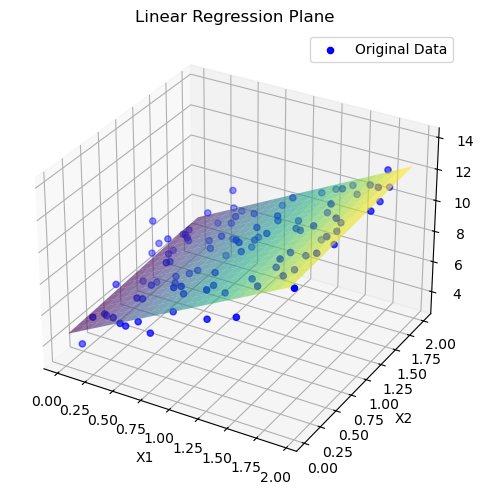

In [28]:


#To ensure that the data generated at random is repeatable, set the random seed. 
# The assignment instructs you to enter your SBU ID's final two # digits here.
randomSeed = 6 # Mine is 116732806 so I am just applying 6 because on 06 it is giving error
np.random.seed(randomSeed)

xData = 2 * np.random.rand(100, 2)           # 100 random 2D points (X1, X2)
yData = 4 + 4 * xData[:, 0] + 0.5 * xData[:, 1] + np.random.randn(100)


onesColumn = np.ones((xData.shape[0], 1))
designMatrix = np.hstack([onesColumn, xData])   # shape (100, 3)

# θ = (Xᵀ X)⁻¹ Xᵀ y
thetaVector = np.linalg.inv(designMatrix.T @ designMatrix) @ designMatrix.T @ yData

intercept = thetaVector[0]
coefficients = thetaVector[1:]

print("Intercept:", intercept)
print("Coefficients:", coefficients)


# 3. Plot original data + plane


fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection="3d")

x1 = xData[:, 0]
x2 = xData[:, 1]
ax.scatter(x1, x2, yData, color="blue", label="Original Data")

# Create a grid over the range of X1 and X2
x1Grid = np.linspace(x1.min(), x1.max(), 20)
x2Grid = np.linspace(x2.min(), x2.max(), 20)
x1Mesh, x2Mesh = np.meshgrid(x1Grid, x2Grid)

# Use the fitted model to calculate the expected y values on this grid:
# y = intercept + theta1 * X1 + theta2 * X2
yPlane = (
    intercept
    + coefficients[0] * x1Mesh
    + coefficients[1] * x2Mesh
)

ax.plot_surface(x1Mesh, x2Mesh, yPlane, alpha=0.6, cmap="viridis")

ax.set_xlabel("X1")
ax.set_ylabel("X2")
ax.set_zlabel("y")
ax.set_title("Linear Regression Plane")
ax.legend()

plt.tight_layout()
plt.show()

# Use the normal equation to find theta.  (Above, using 'thetaVector' = (X^T X)^{-1} X^T y.)

 # Print the regression plane's intercept and coefficients # (done with the 'print' statements above)

 # Plot the regression plane and the produced data.  (Both are shown together in the 3D scatter + surface plot above.)



## 4. Logistic Regression with Numpy and Graphing with Matplotlib (20 pts)

In class, we implemented a logistic regression model to perform binary classification. Here, I provided the exact same code that we discussed in class, but the values for learning_rate and num_epochs are modified. I also removed all the comments. Your task is to
1. Tune the Learning Rate and Number of Epochs: Your first task is to fine-tune the values for the learning_rate and num_epochs parameters. Your goal is to identify suitable values that will enable us to converge to a set of parameter values $\theta$ closely approximating the optimal parameter values $\theta^*$.
2. Code Explanation: To enhance code comprehension, please augment the code with meaningful comments. These comments should elucidate the purpose and functionality of each code segment, making it easier for readers to understand the logistic regression implementation.

By accomplishing these tasks, we aim to achieve a better understanding of the logistic regression model's behavior and its parameter optimization process.

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid (logistic) function.
#  This allows any real number z to be interpreted as a probability by squashing it into the interval (0, 1)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))



# Generate synthetic dataset
# Adjust the random seed such that each time the code is executed, the same synthetic data 
np.random.seed(595)   

# Produce 100 samples with two characteristics each.  
# X has a form of (2, 100), with 100 columns (samples) and two rows (features).
X = np.random.rand(2, 100)   

# True underlying parameters used to generate labels
w_true = np.array([1.5, -2.5])
b_true = 1.0  # True bias

# Compute true probabilities using the real model
probabilities = sigmoid(np.dot(w_true.T, X) + b_true)

# Convert probabilities to binary labels using threshold 0.5
Y = (probabilities > 0.5).astype(int)

# Add noise to features to make classification harder and more realistic
X = X + 0.3 * np.random.rand(2, 100) - 0.1 * np.random.rand(2, 100)

# Use the first 80 points as both the training and test set. 

X_train, X_test = X[:, :80], X[:, :80]
Y_train, Y_test = Y[:80], Y[:80]


# -------------------------
# Initialize model parameters
# -------------------------
w = np.zeros(X.shape[0])   # Initialize weights (2-dimensional vector)
b = 0.0                    # Initialize bias

# Hyperparameters chosen by the student: learning rate and number of epochs.
# These control how big each update is and how many passes we make over the data.
learning_rate = 5.95
num_epochs = 595



for epoch in range(num_epochs):

    # Using the current weights and bias, calculate the projected probability for each training sample.
    A_train = sigmoid(np.dot(w.T, X_train) + b)

   # Determine the loss's gradient in relation to w and b.The average contribution across all training points is dJdw.
    dJdw = np.dot(X_train, (A_train - Y_train).T) / len(Y_train)
    dJdb = np.mean(A_train - Y_train)

    # Update parameters using gradient descent rule
    w -= learning_rate * dJdw
    b -= learning_rate * dJdb


# Calculating the training accuracy

A_train = sigmoid(np.dot(w.T, X_train) + b)
predictions_train = (A_train > 0.5).astype(int)
train_accuracy = np.mean(predictions_train == Y_train)

# Calculating the testing accuracy


A_test = sigmoid(np.dot(w.T, X_test) + b)
predictions_test = (A_test > 0.5).astype(int)
test_accuracy = np.mean(predictions_test == Y_test)

print(f"Training Set Accuracy: {train_accuracy:.2f}")
print(f"Test Set Accuracy: {test_accuracy:.2f}")







Training Set Accuracy: 0.89
Test Set Accuracy: 0.89


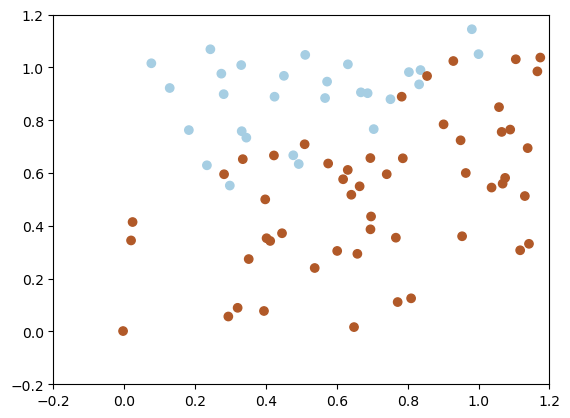

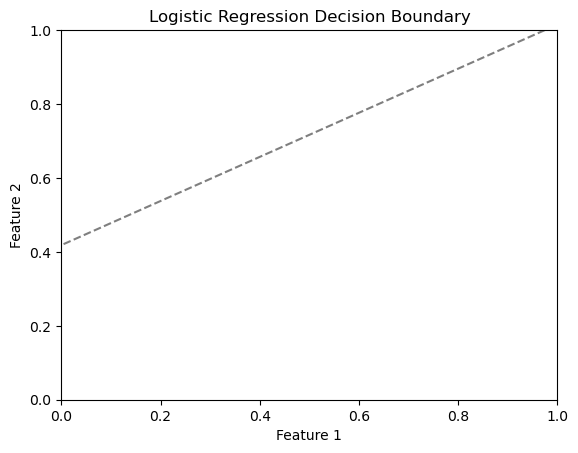

In [30]:
#plotting
plt.scatter(X[0, :80], X[1, :80], c=Y[:80], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)
plt.show()



# Ploting the logistic regression decision boundary

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()


xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))


Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)

# line for probability = 0.5
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()

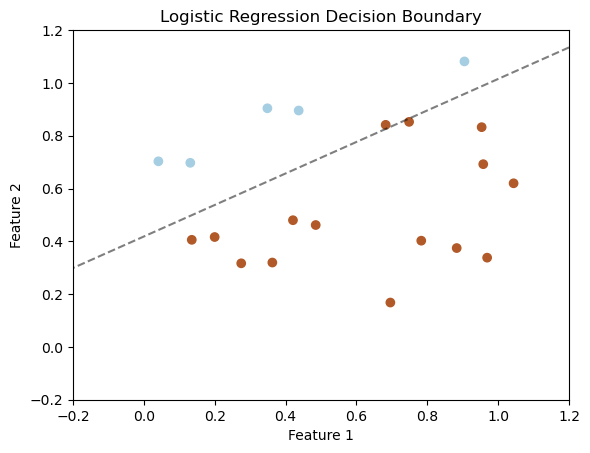

In [31]:
plt.scatter(X[0, 80:], X[1, 80:], c=Y[80:], cmap=plt.cm.Paired)
plt.xlim(-0.2, 1.2)
plt.ylim(-0.2, 1.2)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50), np.linspace(ylim[0], ylim[1], 50))
Z = np.dot(w.T, np.c_[xx.ravel(), yy.ravel()].T) + b
Z = sigmoid(Z)
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[0.5], alpha=0.5, linestyles=['--'])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression Decision Boundary')
plt.show()